In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py

In [2]:
dff_path = r'/Volumes/My Passport/Openscope Motion/ophys_session_923803144/ophys_experiment_924134723/924134723_dff.h5'

In [19]:
stim_table = pd.read_csv(r'/Volumes/Brain2018/Openscope_Motion/stim_tables/923803144_stim_table.csv')

In [8]:
f = h5py.File(dff_path, 'r')
dff = f['data'].value
f.close()

In [15]:
dff.shape

(250, 108658)

In [20]:
numbercells = dff.shape[0]

In [24]:
def do_sweep_mean(x):
    return x[30:90].mean()

In [32]:
sweep_response = pd.DataFrame(index=stim_table.index.values, columns=np.array(range(numbercells)).astype(str))
for index, row in stim_table.iterrows():
    for nc in range(numbercells):
        sweep_response[str(nc)][index] = dff[nc, int(row.Start)-30:int(row.End)+30]
mean_sweep_response = sweep_response.applymap(do_sweep_mean)

In [76]:
mean_sweep_response.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.001080,NaN,0.001333,0.046371,0.007587,0.012771,0.152840,0.013400,NaN,NaN,...,0.631630,0.076437,0.454182,0.056117,0.005503,0.378163,0.031169,-0.014426,NaN,0.018677
1,-0.009042,NaN,0.003686,-0.025391,-0.005775,-0.008881,-0.005265,-0.015338,NaN,NaN,...,0.269472,1.395466,0.144430,-0.007472,0.001309,0.005926,-0.022213,-0.001707,NaN,0.108350
2,0.017927,NaN,0.005578,0.027042,0.015438,0.007237,0.008527,0.010400,NaN,NaN,...,0.001513,0.082741,0.007735,-0.006365,0.000632,0.041077,0.018210,0.012190,NaN,0.000331
3,-0.009693,NaN,0.005296,-0.028972,-0.008874,0.005924,-0.012467,0.011514,NaN,NaN,...,0.033169,0.050008,0.017819,0.009278,-0.000557,-0.039895,0.039488,-0.008010,NaN,0.027874
4,0.005583,NaN,-0.005685,-0.011839,0.005838,-0.006819,0.004320,-0.000249,NaN,NaN,...,0.031851,-0.001153,0.140529,-0.005512,-0.011394,0.026892,-0.015786,-0.011481,NaN,-0.008913


In [34]:
np.where(np.isnan(dff[:,0]))

(array([  1,   8,   9,  12,  40,  41,  57,  62,  67,  89,  90,  92,  95,
         96, 118, 123, 126, 130, 141, 149, 166, 183, 189, 190, 203, 209,
        214, 226, 227, 228, 232, 248]),)

In [56]:
frames = np.arange(0,10800,60)

In [57]:
len(frames)

180

In [59]:
response = np.empty((180, numbercells, 2))
for i,v in enumerate(frames):
    response[i,:,0] = mean_sweep_response[stim_table.start_frame==v].mean().values
    response[i,:,1] = mean_sweep_response[stim_table.start_frame==v].std().values/np.sqrt(len(mean_sweep_response[stim_table.start_frame==v]))

<ErrorbarContainer object of 3 artists>

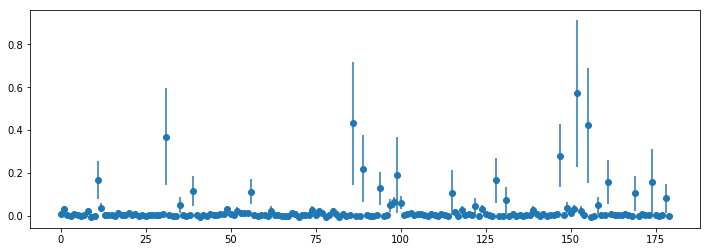

In [75]:
nc=11
plt.figure(figsize=(12,4))
plt.errorbar(range(180),response[:,nc,0], yerr=response[:,nc,1], fmt='o')

In [77]:
save_file = r'/Volumes/Brain2018/Openscope_Motion/motion_analysis/923803144_analysis.h5'
store = pd.HDFStore(save_file)
store['sweep_response'] = sweep_response
store['mean_sweep_response'] = mean_sweep_response
store['stim_table'] = stim_table
store.close()
f = h5py.File(save_file, 'r+')
dset = f.create_dataset('response', data=response)
f.close()

/Users/saskiad/anaconda2/envs/ecephys/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3291: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '11